In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

np.random.seed(42)   #Fixing Randomness
RND = 42

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# LOADING DATA
os.chdir("C:\\Users\\pranj\\Downloads")
df = pd.read_csv("Enhanced_LDC_Loans_AI_Project.csv")

In [ ]:
df = df.drop_duplicates()
df = df.fillna(df.median(numeric_only=True))

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df["Date Loan Awarded"] = pd.to_datetime(df["Date Loan Awarded"], errors="coerce")
df["Fiscal Year End Date"] = pd.to_datetime(df["Fiscal Year End Date"], errors="coerce")

df["Date Loan Awarded"] = df["Date Loan Awarded"].fillna(df["Date Loan Awarded"].median())
df["Fiscal Year End Date"] = df["Fiscal Year End Date"].fillna(df["Fiscal Year End Date"].median())

df = df[df["Original Loan Amount"] > 0]
df = df[df["Borrower_Credit_Score"].between(300, 850)]


In [ ]:
X = df[["Original Loan Amount"]]
y = df["Amount Repaid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RND)

slr = LinearRegression()
slr.fit(X_train, y_train)
pred = slr.predict(X_test)

print("\n SIMPLE LINEAR REGRESSION ")
print("RMSE:", root_mean_squared_error(y_test, pred))
print("R²:", r2_score(y_test, pred))

# Residual Plot
res = y_test - pred


 SIMPLE LINEAR REGRESSION 
RMSE: 385609.0236787097
R²: -0.8786332298548767


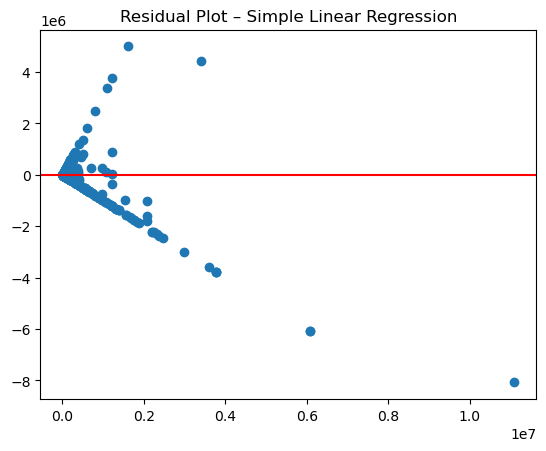

In [ ]:
plt.scatter(pred, res)
plt.axhline(0, color="red")
plt.title("Residual Plot – Simple Linear Regression")
plt.show()

In [ ]:
X = df[["Original Loan Amount","Interest Rate","Loan Length","Borrower_Credit_Score"]]
y = df["Amount Repaid"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=RND)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
pred = mlr.predict(X_test)

print("\nMULTIPLE LINEAR REGRESSION ")
print("RMSE:", root_mean_squared_error(y_test, pred))
print("R²:", r2_score(y_test, pred))



MULTIPLE LINEAR REGRESSION 
RMSE: 386242.5228199207
R²: -0.8848109386475045


In [ ]:
# OBJECTIVE 3: POLYNOMIAL REGRESSION
X = df[["Original Loan Amount"]]
y = df["Amount Repaid"]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=RND)

pr = LinearRegression()
pr.fit(X_train, y_train)
pred = pr.predict(X_test)

print("\n POLYNOMIAL REGRESSION ")
print("RMSE:", root_mean_squared_error(y_test, pred))
print("R²:", r2_score(y_test, pred))



 POLYNOMIAL REGRESSION 
RMSE: 441167.6207627491
R²: -1.4589793614587019



 LOGISTIC REGRESSION 
Accuracy: 0.8399138549892319
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1897
           1       0.77      0.71      0.74       889

    accuracy                           0.84      2786
   macro avg       0.82      0.80      0.81      2786
weighted avg       0.84      0.84      0.84      2786



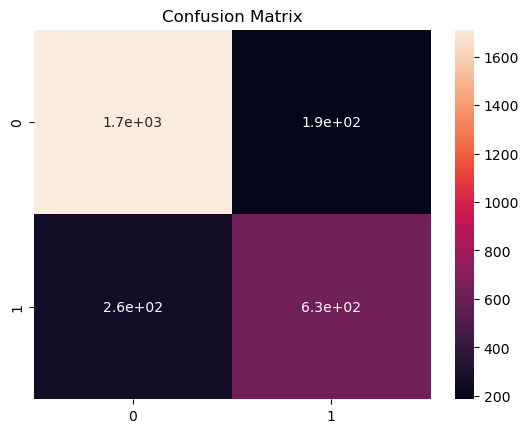

In [ ]:
le = LabelEncoder()
df["Default_Label"] = le.fit_transform(df["Default_Risk"])

X = df[["Borrower_Credit_Score","Loan_Efficiency_Ratio","Original Loan Amount"]]
y = df["Default_Label"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RND, stratify=y
)

log = LogisticRegression(max_iter=1000, random_state=RND)
log.fit(X_train, y_train)
pred = log.predict(X_test)

print("\n LOGISTIC REGRESSION ")
print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True,)
plt.title("Confusion Matrix")
plt.show()



ROC-AUC: 0.9173865786544737


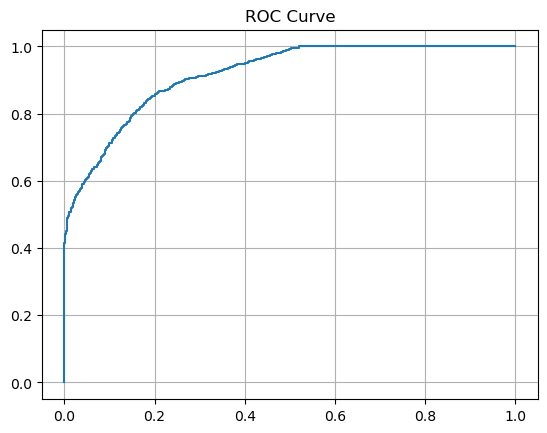

In [ ]:
# ROC Curve
probs = log.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, probs)
print("ROC-AUC:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.grid()
plt.title("ROC Curve")
plt.show()

In [ ]:
models = {
    "Logistic": LogisticRegression(max_iter=1000, random_state=RND),
    "Decision Tree": DecisionTreeClassifier(random_state=RND),
    "Random Forest": RandomForestClassifier(random_state=RND),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

accuracies = {}

print("\n--- MODEL COMPARISON ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies[name] = acc
    print(name, "Accuracy:", acc)

best_model = max(accuracies, key=accuracies.get)
print("\nBEST CLASSIFICATION MODEL:", best_model)


--- MODEL COMPARISON ---
Logistic Accuracy: 0.8399138549892319
Decision Tree Accuracy: 0.9992821249102656
Random Forest Accuracy: 1.0
KNN Accuracy: 0.9816941852117731
Naive Bayes Accuracy: 0.8557071069633884

BEST CLASSIFICATION MODEL: Random Forest


In [ ]:
print("\nCROSS VALIDATION ")
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring="accuracy")
    print(name, "Mean:", scores.mean()," | ", "Std:", scores.std())


CROSS VALIDATION 
Logistic Mean: 0.8447844505935679  |  Std: 0.01295258356285786
Decision Tree Mean: 0.9997846374730797  |  Std: 0.00043072505384063043
Random Forest Mean: 0.9998564249820532  |  Std: 0.00017584276689037458
KNN Mean: 0.9844925319080657  |  Std: 0.003968405730101894
Naive Bayes Mean: 0.8585676523164683  |  Std: 0.013352746863853475
